# Graph Requirements

The input must be an adjacency list of a non directed graph with distinct weights

## Libraries import

In [1]:
import json                       # Read and write files in json
import numpy as np                # Matrix operations
import networkx as nx             # Graph operation and display
from pprint import pprint         # Pretty printing of matrices
import matplotlib.pyplot as plt   # Plot figures

## Settings

In [2]:
file_path = "test_graph.json"

## Load the graph

In [3]:
with open(file_path,"r") as f:
    graph = json.load(f)
pprint(graph)

[[[4, 0.736], [5, 0.259]],
 [[2, 0.197]],
 [[1, 0.197], [4, 0.535], [5, 0.727], [6, 0.555]],
 [[4, 0.241]],
 [[0, 0.736], [2, 0.535], [3, 0.241], [5, 0.385], [6, 0.29]],
 [[0, 0.259], [2, 0.727], [4, 0.385]],
 [[2, 0.555], [4, 0.29]]]


In [4]:
n_of_vertices = len(graph)
vertices = list(range(n_of_vertices))
print(vertices)

[0, 1, 2, 3, 4, 5, 6]


# Borůvka's algorithm

In [5]:
def find_min_outgoing_edge(graph, tree):
    edges = []
    # for each vertex in the set
    for vertex in tree:
        # for each edge that start at that vertex
        for end,weight in graph[vertex]:
            # if the edge goes to a different set
            if end not in tree:
                # add it to the list of possible outgoing edges
                edges += [(vertex,end,weight)]
    # return the minimum of the outgoing edges
    return min(edges,key=lambda x: x[2])

In [6]:
def find_set_index(tree_list, vertex):
    # for each set
    for index,t_list in enumerate(tree_list):
        # if the vertex is in the set
        if vertex in t_list:
            # return it's index
            return index

In [7]:
# create a forest of trees with only the root. one for each vertex
tree_list = [[x] for x in vertices]
# Set of edges of the MST
MST_edges = []

In [8]:
while len(tree_list) > 1:
    t_index = 0
    while t_index < len(tree_list):
        # get the set
        tree = tree_list[t_index]
        # find the minimum outgoing edge from the set
        min_edge = find_min_outgoing_edge(graph,tree)
        # add that edge to the list of edges of the MST
        MST_edges += [min_edge]
        # find from which other set is from the destination vertex of the edge
        second_set_index = find_set_index(tree_list, min_edge[1])
        # Merge the two sets
        tree_list[t_index] += tree_list[second_set_index]
        # Delete the second set
        del tree_list[second_set_index]
        # go to the next set
        t_index += 1
# Print the results
pprint(MST_edges)

[(0, 5, 0.259),
 (1, 2, 0.197),
 (3, 4, 0.241),
 (6, 4, 0.29),
 (5, 4, 0.385),
 (2, 4, 0.535)]


# Display the result

In [9]:
# Display settings
figure_size = (5,5)            # (x,y) expressed in inches
node_color = "#89b2f4"         # Color of the nodes of the graph in the #RRBBGG format
mst_edges_color = "#FF0000"    # Color of the edges that form the MST
default_edge_colour = "#000000"# Clour of the edges that don't belong to the MST

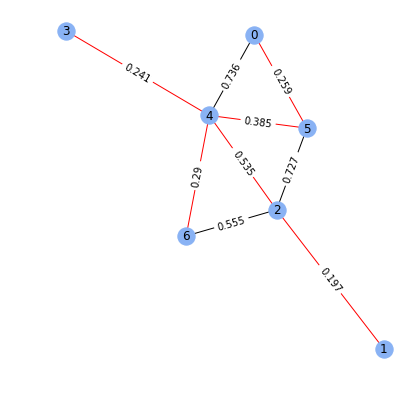

In [10]:
# Create an empty graph
g = nx.Graph()

# add all the vertecies to the graph
for i in range(n_of_vertices):
    g.add_node(i)

# Add all the edges to the graph
for start in range(n_of_vertices):
    for end,weight in graph[start]:
        g.add_edge(start,end,weight=weight)
        
        
for start,end,weight in MST_edges:
    g.add_edge(start,end,weight=weight,color=mst_edges_color)
    
# Display the Graph
# Create and set the dimension of the final image
plt.figure(figsize=figure_size)
# Calculate the spatial disposition of the nodes using the spring algorithm
pos = nx.spring_layout(g)
# Get the colours of the modified edges
colour_dict = nx.get_edge_attributes(g,"color")
# Calculate the colour of the edges
e_color = [ colour_dict.get(edge,default_edge_colour) for edge in g.edges()]
# Draw the graph
nx.draw(g,pos, with_labels=True,node_color=node_color,edge_color=e_color)
# Draw the weight labels over the edges
nx.draw_networkx_edge_labels(g,pos,edge_labels=nx.get_edge_attributes(g,"weight"))
# Show the result
plt.show()